In [1]:
import numpy as np
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlib.use("pgf")
sns.set_theme(rc={
    #"pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    #'text.usetex': True,
    #'pgf.rcfonts': False,
})

In [2]:
SKIP_VALUES = 0
CONTENTS = [
    "popped",
    "max_multiplicity",
    "max_delta",
]
DEFAULT_INIT_VALUE=1

In [3]:
def read_log(content, suffix, rows=None):
    raw = np.loadtxt("vkr/cmake-build-release/bin/" + content + suffix, skiprows=SKIP_VALUES, max_rows=rows, dtype=np.int64)
    return pd.DataFrame(raw, columns=['x', content])

In [4]:
def process(suffix, init_value=DEFAULT_INIT_VALUE):
    log = pd.DataFrame(columns=['x'])
    for content in CONTENTS:
        # print(content)
        log = pd.merge(log, read_log(content, '_' + str(init_value) + suffix), on='x', how='right')
    log = pd.DataFrame(log[log["x"] > init_value])
    log['density'] = log['popped'] / (log['x'] - init_value + 1)
    # print(log)
    # fig, axs = plt.subplots(len(CONTENTS), 1, sharex=True)
    # width=8.9 is to much
    # height=10.7 is to much
    # fig.set_figheight(4)
    # fig.set_figwidth(7.1)
    # ax1.plot('total', 'density', data=log)
    # ax1.set_xscale("log")
    g = sns.PairGrid(log, x_vars=['x'], y_vars=['density', 'max_delta', 'max_multiplicity'])
    g.map(sns.lineplot)
    g.set(xscale='log')
    g.set(xlabel="Размер префикса")
    for ax, label in zip(g.figure.axes, ["Плотность", "Максимальный промежуток", "Максимальная кратность"]):
        ax.set_ylabel(label)
    # ax1.set_ylabel("Плотность")
    # ax2.plot('x', 'densityDelta', 'o', data=log)
    # ax2.set_xscale("log")
    # ax2.set_yscale("log")
    # ax2.set_xlabel("Размер префикса")
    # ax2.set_ylabel("Изменение плотности")
    g.savefig('figure' + suffix + '.pgf')

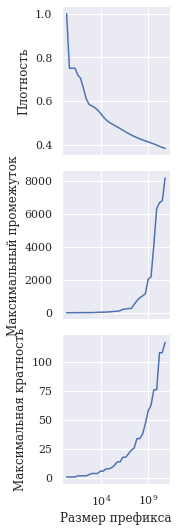

In [5]:
process('_0_2_3')

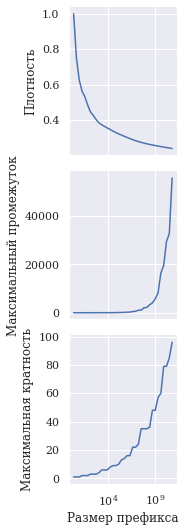

In [6]:
process('_0_3_10')

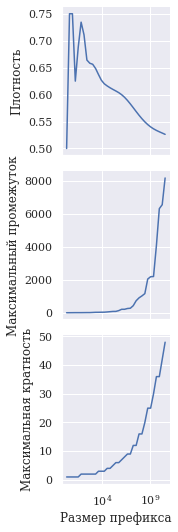

In [7]:
process('_1_0_2')

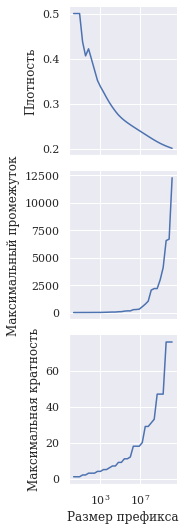

In [8]:
process('_1_6_0')

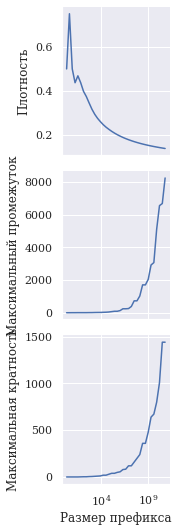

In [9]:
process('_2_0_15')

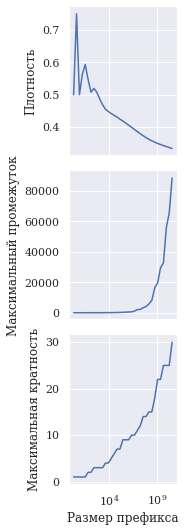

In [10]:
process('_2_1_0')

                count         total   density
0               266.0  1.000000e+03  0.266000
1               474.0  2.000000e+03  0.237000
2               691.0  3.000000e+03  0.230333
3               861.0  4.000000e+03  0.215250
4              1099.0  5.000000e+03  0.219800
...               ...           ...       ...
9999998   445290308.0  9.999999e+09  0.044529
9999999   445290308.0  1.000000e+10  0.044529
10000000  445290308.0  1.000000e+10  0.044529
10000001  445290308.0  1.000000e+10  0.044529
10000002  445290308.0  1.000000e+10  0.044529

[10000003 rows x 3 columns]


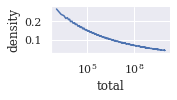

In [13]:
process("densityLogger_1651690759_1_1_1")